# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

In [2]:
#I am chosing the wind dataset from assignment 5 to do further analysis. I am loading in the tidyverse package and reading in the wind file.
library("tidyverse")
library("ggrepel")
wind <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv")
head(wind)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


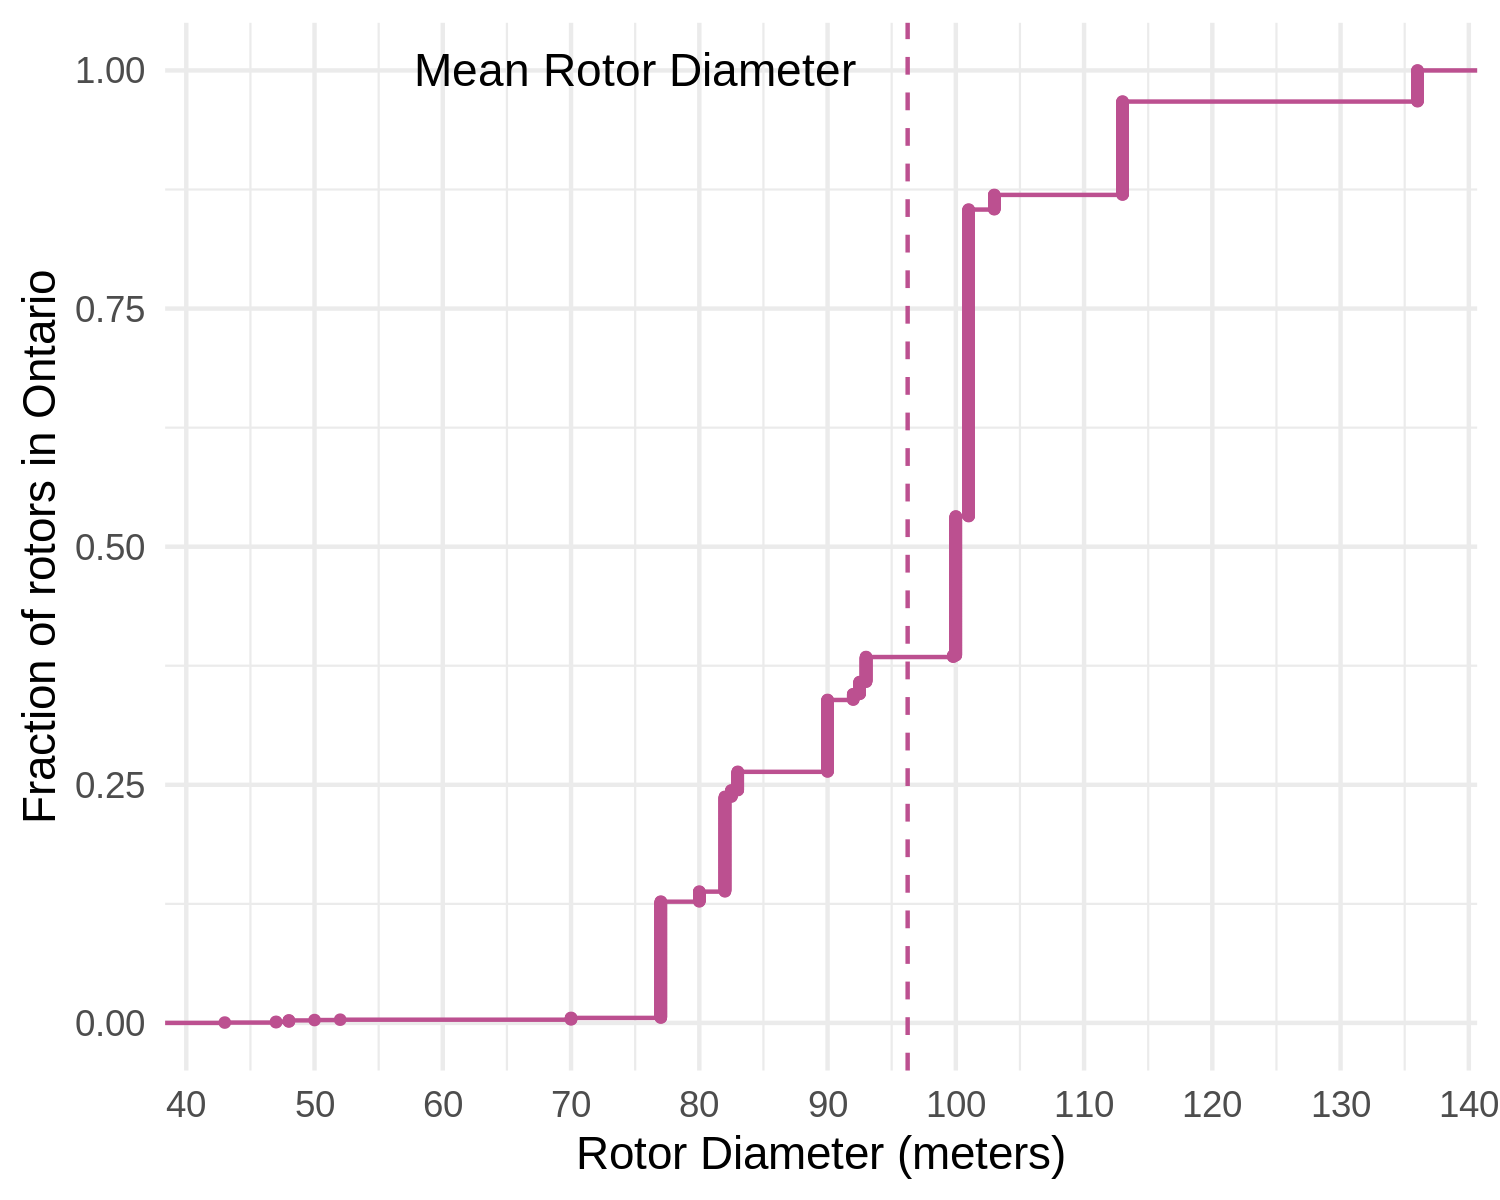

In [13]:
#My first visualization will be an ECDF of rotor diameters in Ontario.

wind_ecdf <- wind |>
    filter(province_territory == "Ontario") |>
    arrange(rotor_diameter_m) |>
    mutate(rk = row_number() / n())

p = ggplot(wind_ecdf, aes(x = rotor_diameter_m, y = rk)) + geom_point(color = "#bc5090", size = .75) +
    annotate("text",label = "Mean Rotor Diameter", x  = 75, y = 1) +
    geom_vline(aes(xintercept = mean(x = rotor_diameter_m)), linetype = "dashed",color = "#bc5090") +
    labs(y = "Fraction of rotors in Ontario", x = "Rotor Diameter (meters)") + 
    theme_minimal() + 
    stat_ecdf(color = "#bc5090") +
    scale_x_continuous(breaks=seq(0,200,by=10)) 
    
p

## Requirements

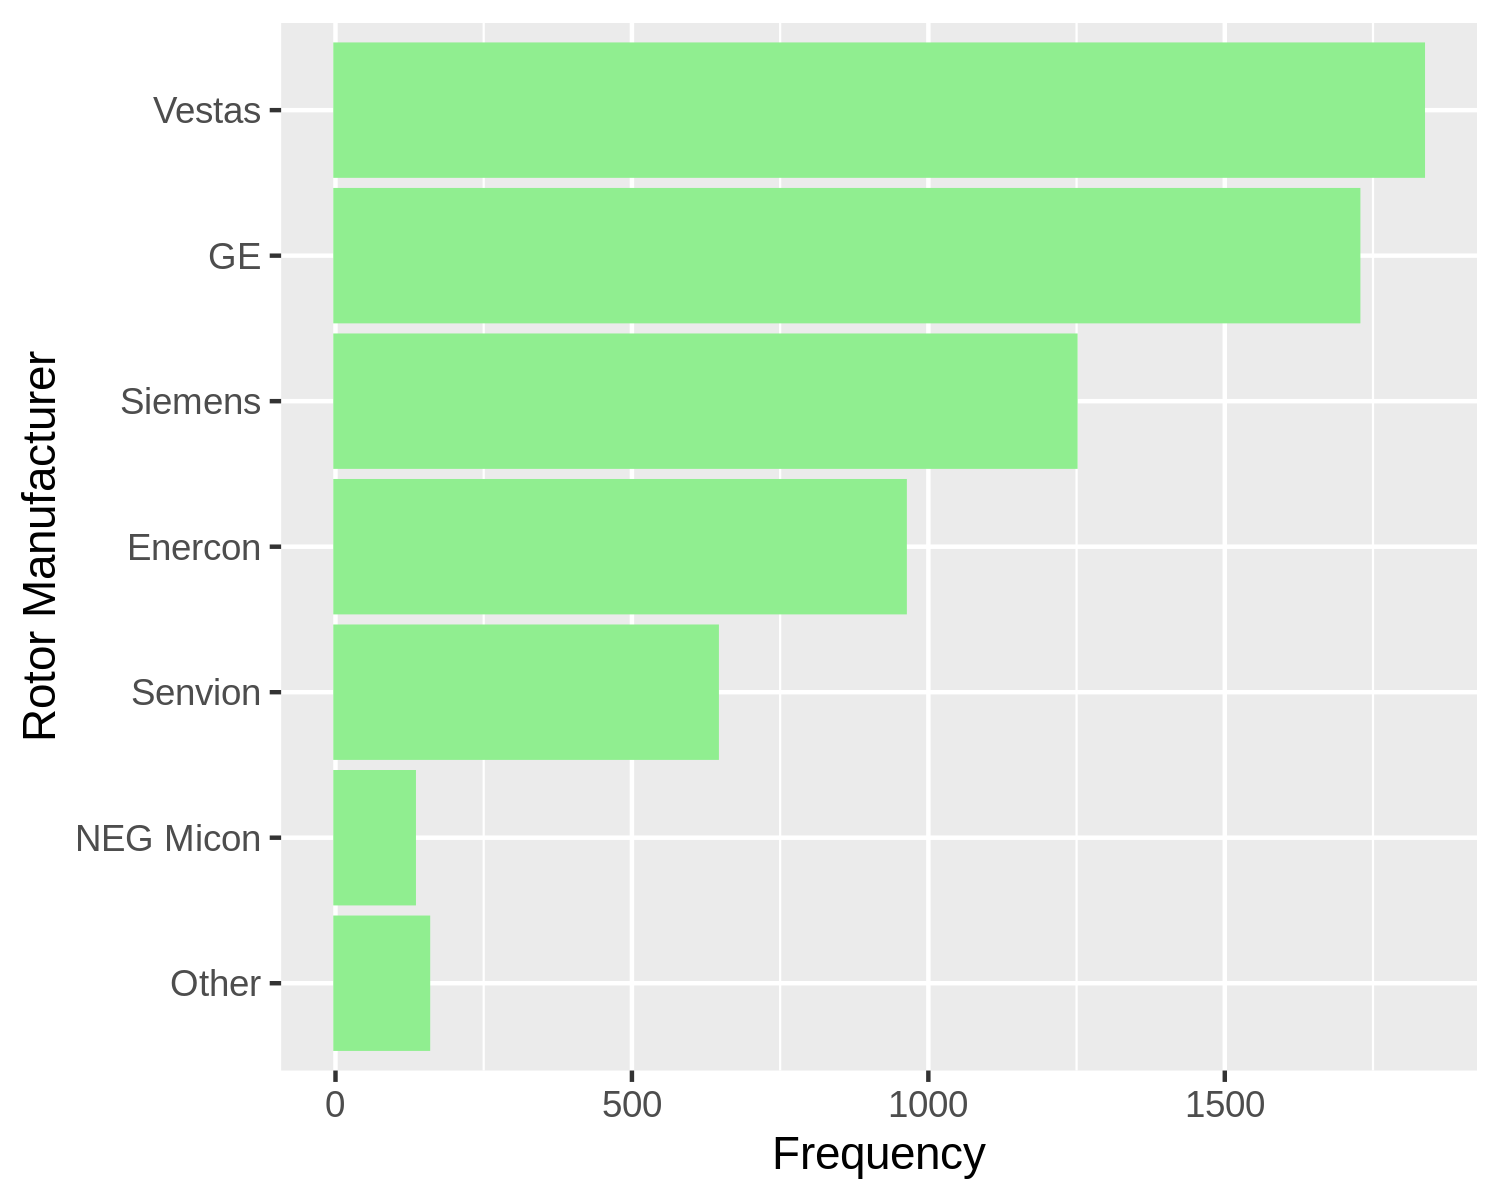

In [4]:
#My second chart will be a visualization of the manufacturers of rotors

p = ggplot(wind, aes(x = manufacturer |> fct_infreq() |> fct_lump(n = 6) |> fct_rev())) + 
    geom_bar(color = "lightgreen", fill = "lightgreen") +  
    coord_flip() +
    labs(x = "Rotor Manufacturer", y = "Frequency") +
    theme_classic() +
    theme_set(theme_gray(base_size = 12))
p

Province,Earliest Commissioning Year,Number of rotors
<chr>,<chr>,<int>
Alberta,1993,900
British Columbia,2009,292
New Brunswick,2008,119
Newfoundland and Labrador,2004,27
Northwest Territories,2012,4
Nova Scotia,2002,310
Ontario,1995,2663
Prince Edward Island,2001,104
Quebec,1999,1991


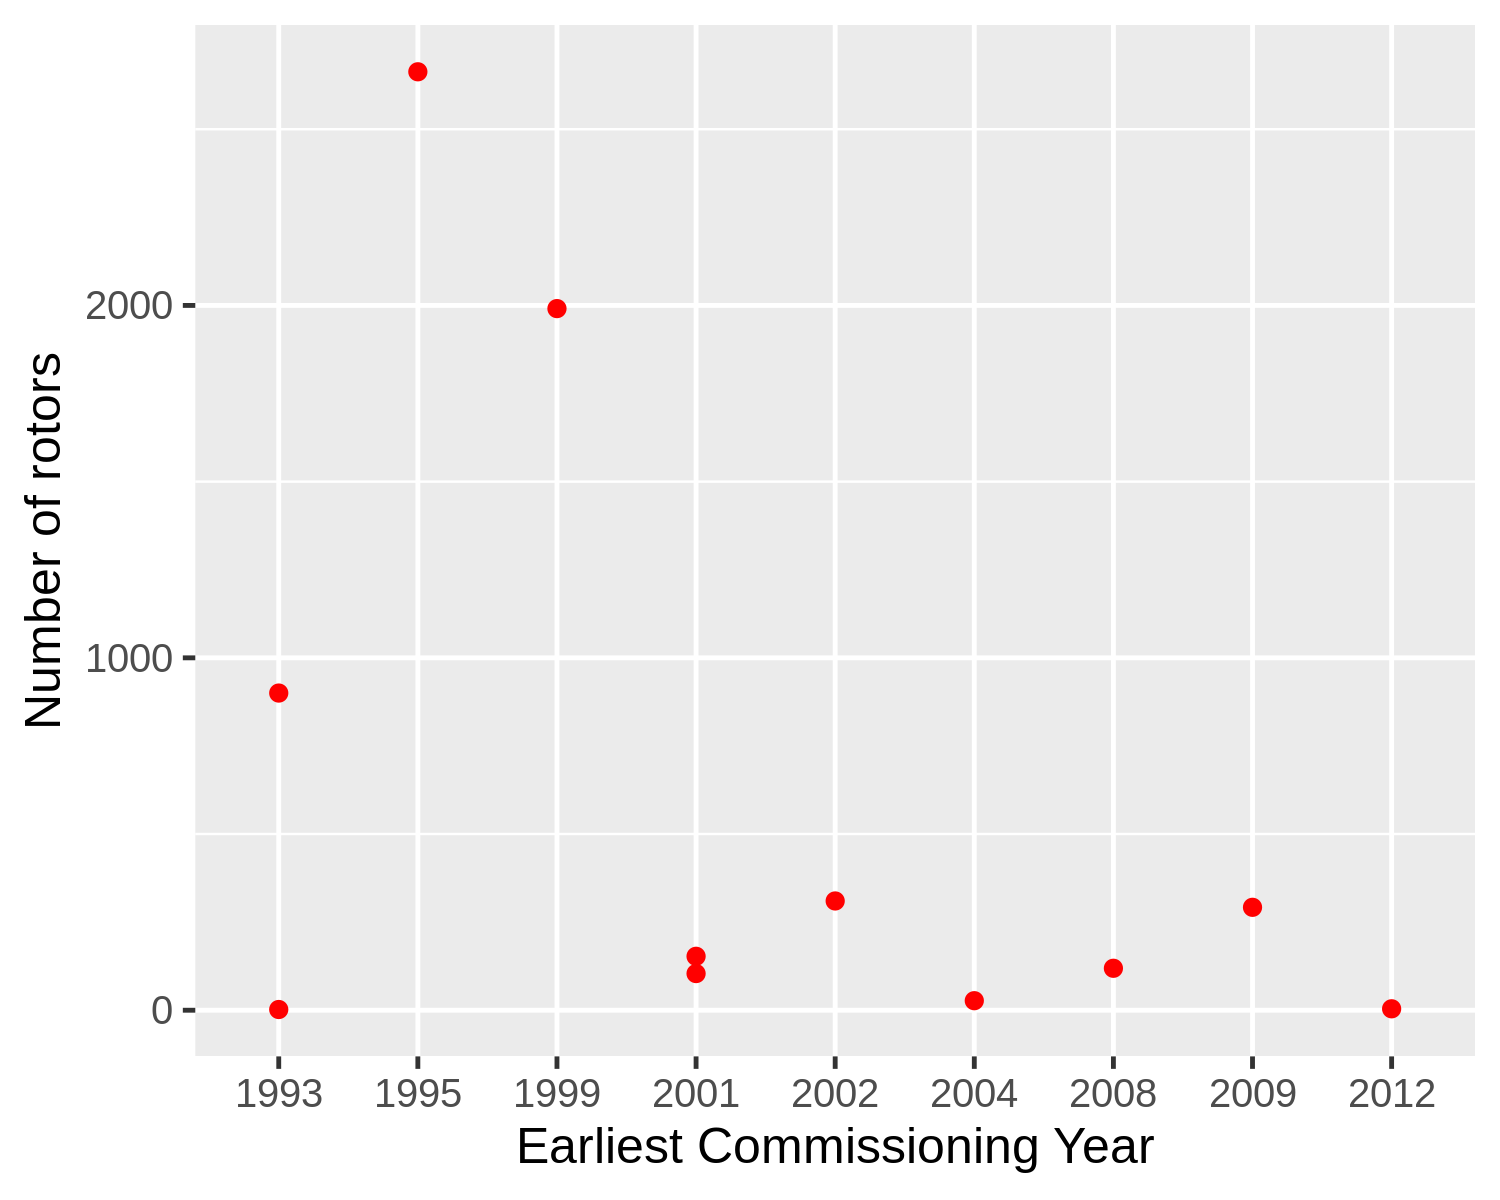

In [5]:
#My third and fourth charts are a table and a figure displaying the earliest commissioning date and number of rotors in each province.

wind_sum <- wind |>
    mutate(`Province` = province_territory) |>
    filter(Province != "Manitoba") |>
    group_by(Province) |>
    summarize(`Earliest Commissioning Year` = min(commissioning_date),`Number of rotors` = n())

wind_sum

p = ggplot(wind_sum, aes(x = `Earliest Commissioning Year`, y = `Number of rotors`)) + geom_point(color = 'Red')
p

In my final project, I used the wind dataset from the TidyTuesday github repository. This dataset contains information on windmills in Canada. For my first figure, I constructed an ECDF plot of the rotor diameters in Ontario. I also added a line denoting the mean rotor diameter. This allows for a visualization of how long the rotors in Ontario are, and the distribution of these lengths. For my second plot, I did a frequency bar chart of the various manufacturers of the rotors. I also grouped several of the manufacturers into "Other" to reduce the number of bars.

For my last two plots, I constructed a table denoting the earliest commissioning date of any rotor in each province (except for Manitoba province due to data issues). I also added the number of rotors for that province. I also plotted these values. This table and visualization can provide insight into the question, "Does starting a windmill program earlier in a province lead to more rotors being built overall?"

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 